In [5]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


First few rows of the dataset:
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1   37    1   2     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2   41    0   1     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3   56    1   1     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4   57    0   0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0       1  
1    0.0  0.0   2.0       1  
2    2.0  0.0   2.0       1  
3    2.0  0.0   2.0       1  
4    2.0  0.0   2.0       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1622 non-null   int64  
 1   sex       1622 non-null   int64  
 2   cp        1622 non-null   int64  
 3   trestbps  1621 n

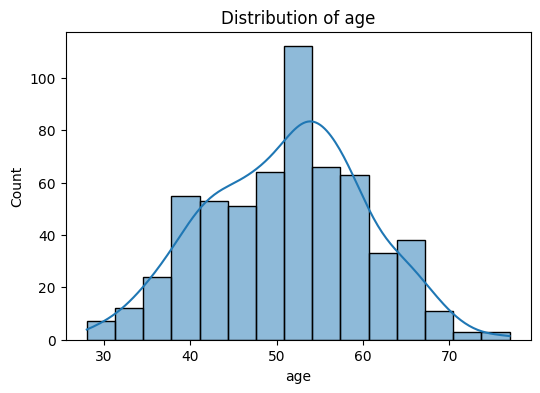

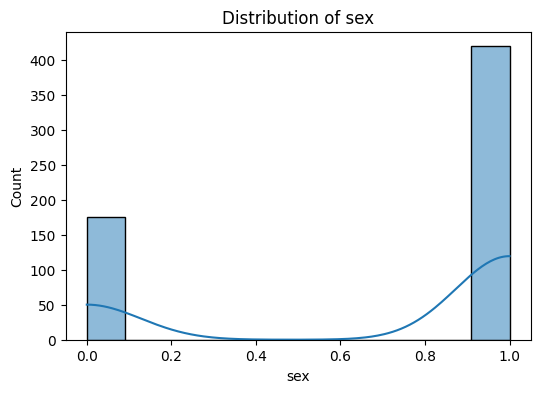

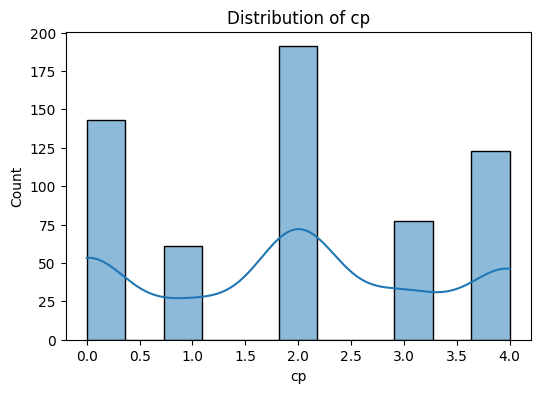

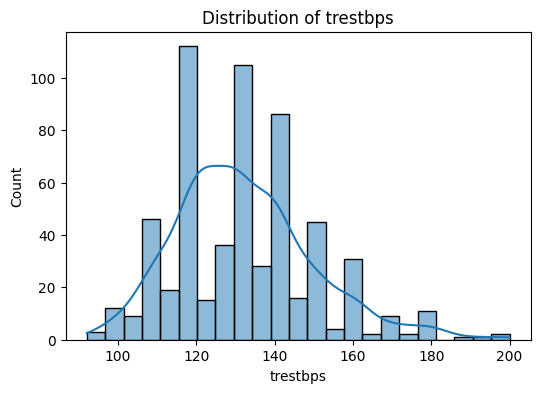

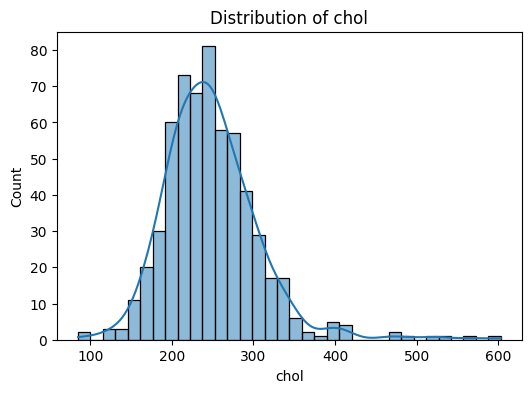

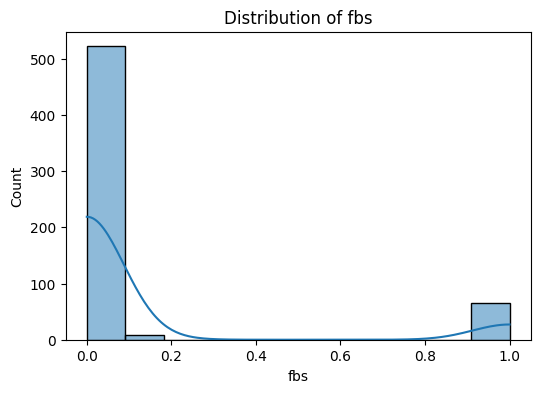

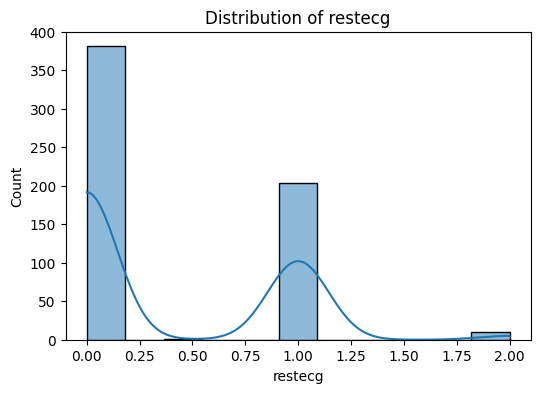

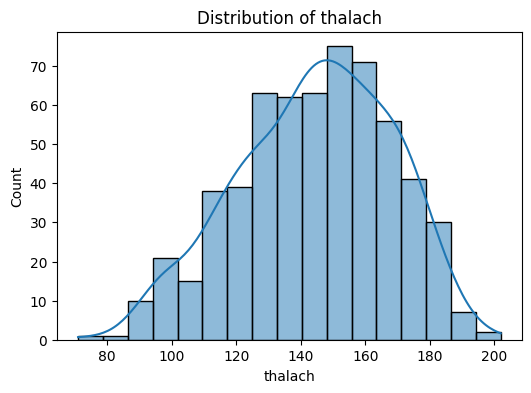

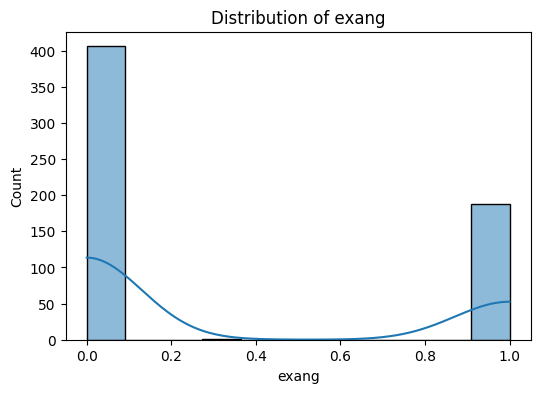

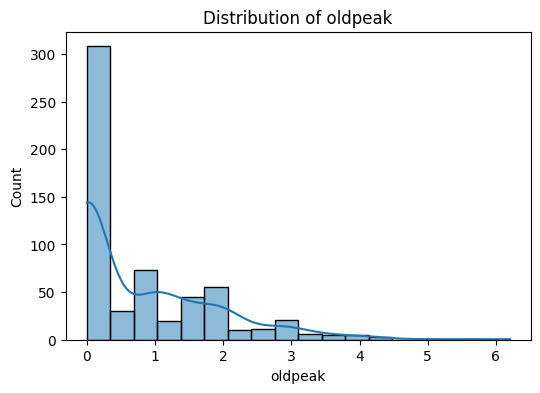

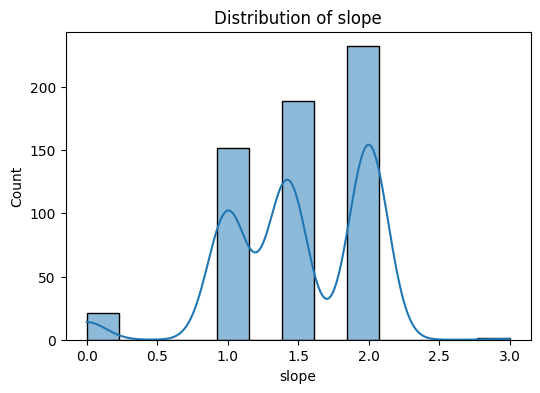

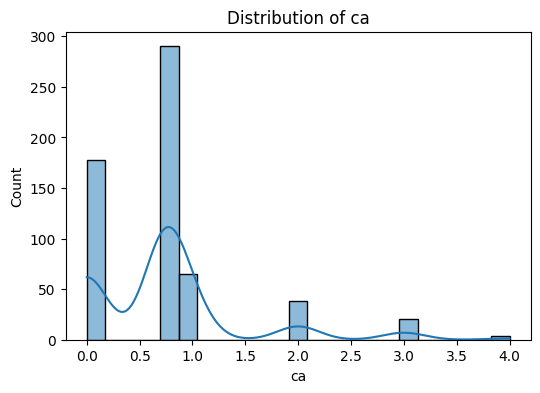

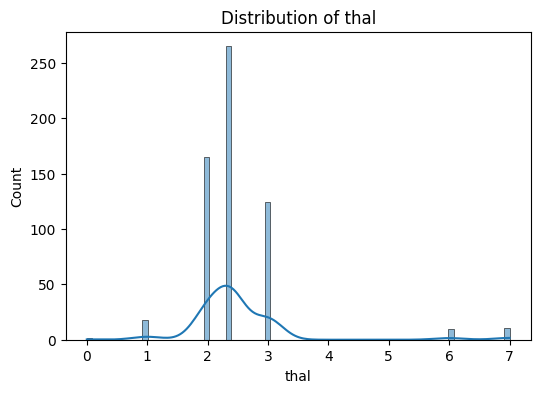

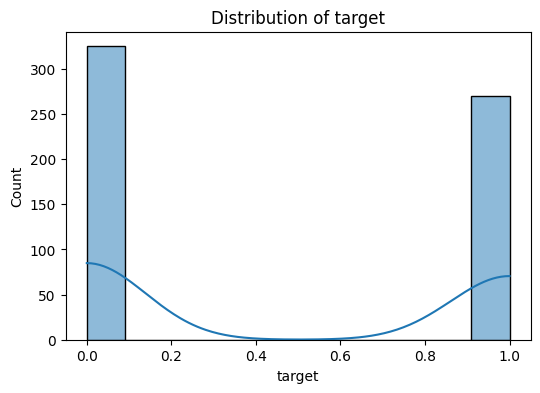

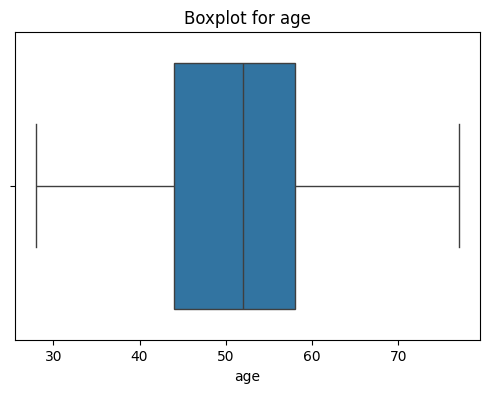

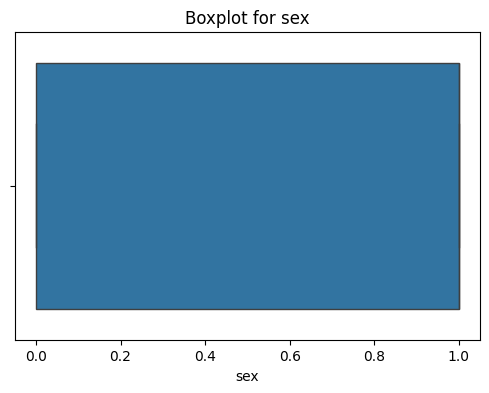

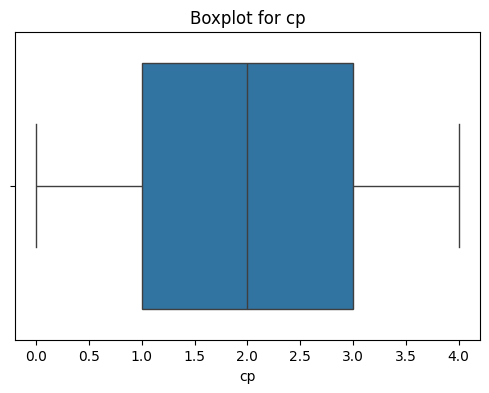

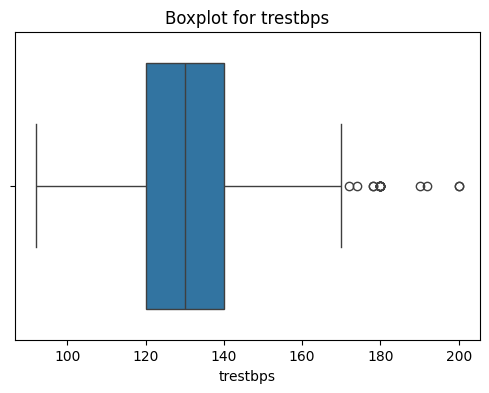

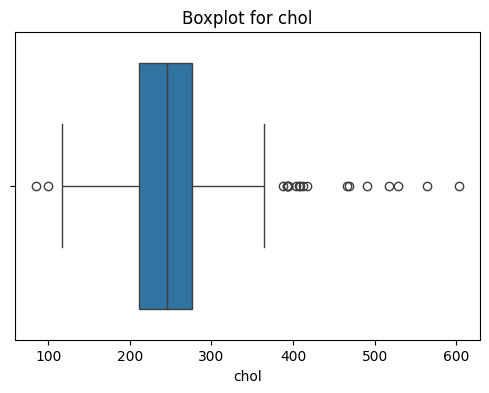

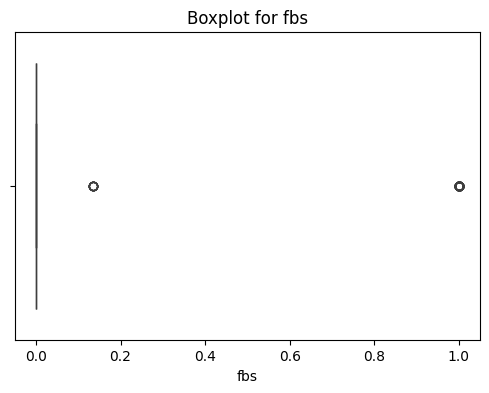

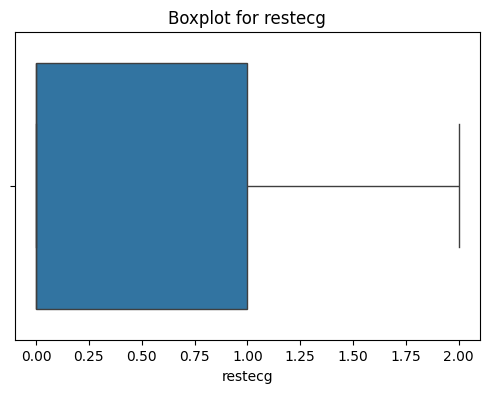

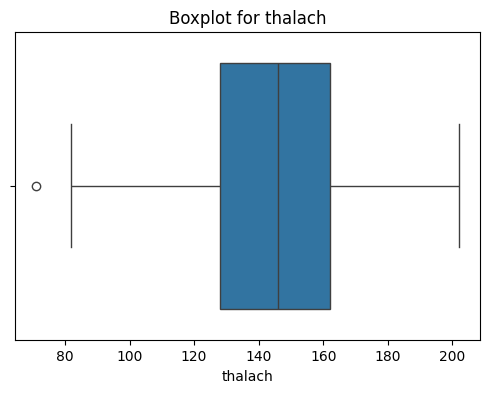

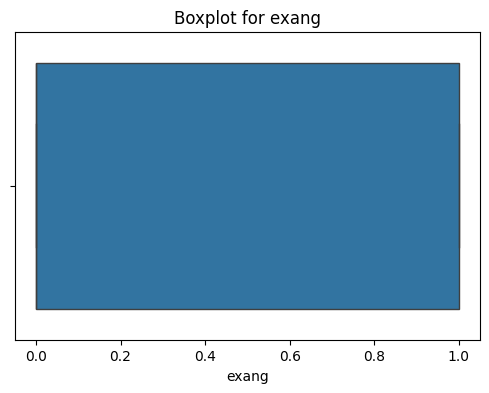

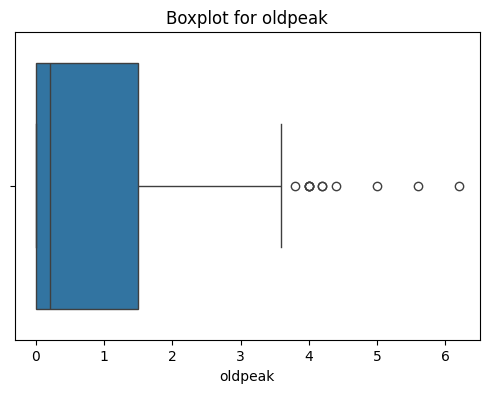

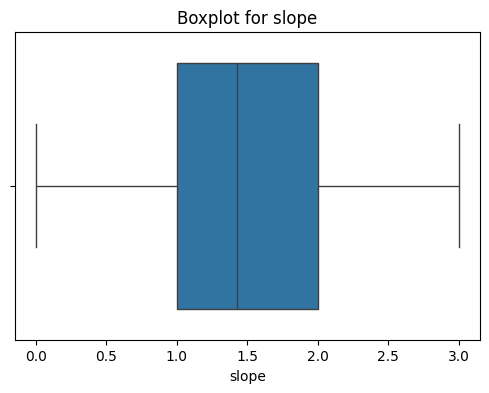

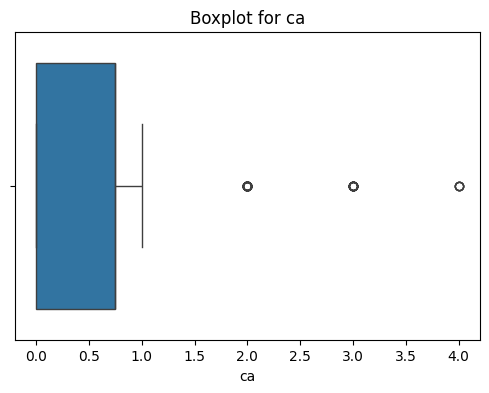

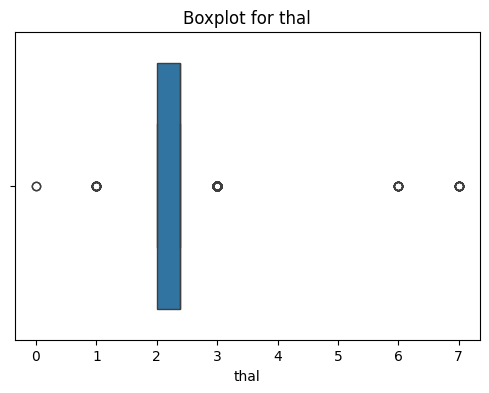

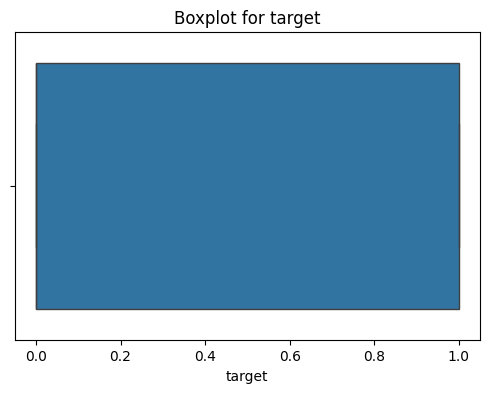

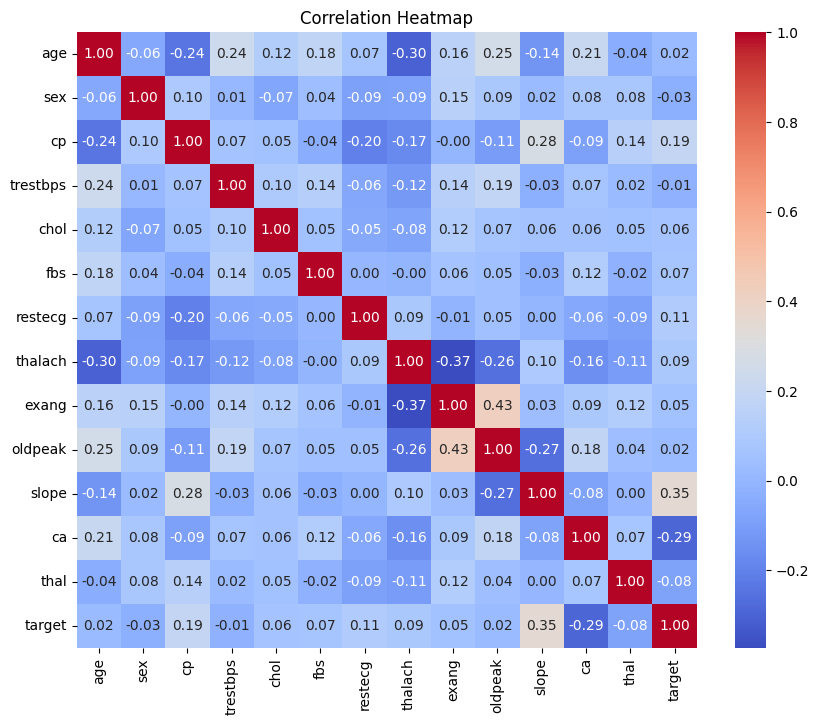

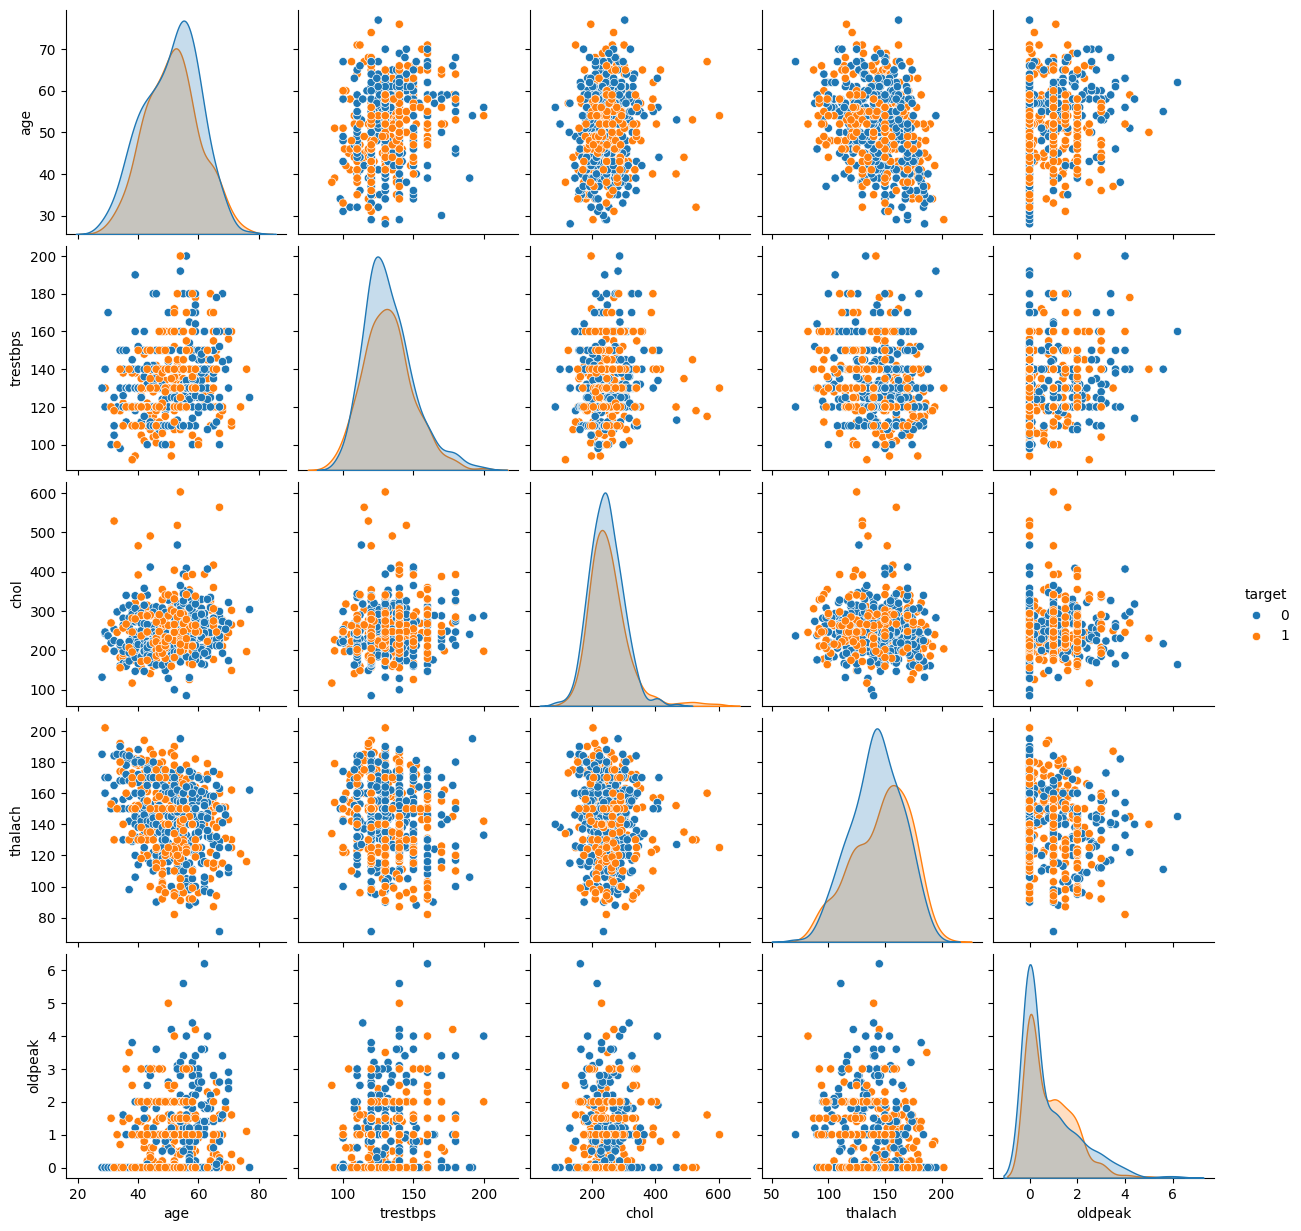


Cleaned dataset saved as: C:\Users\DELL\Downloads\cleaned_heart_dataset.csv


In [6]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# First, I will load the dataset from the file path provided on my machine.
file_path = r"C:\Users\DELL\Downloads\archive\final_merged_heart_dataset.csv.xlsx"
df = pd.read_excel(file_path)

# Step 2: Inspect the first few rows of the dataset
# To understand the structure of the data, I will print the first few rows.
print("First few rows of the dataset:")
print(df.head())

# Step 3: Check the structure and data types of the dataset
# I will check the dataset's structure and the data types of the columns to ensure everything is in the correct format.
print("\nDataset Info:")
print(df.info())

# Step 4: Check for missing values
# I want to identify if any columns have missing values that need to be handled. 
# I'll sum up the missing values across all columns.
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 5: Handle missing values
# If there are missing values, I will impute them with the mean for numerical columns. 
# For now, I will use mean imputation for simplicity, but other methods can be applied depending on the situation.
df.fillna(df.mean(), inplace=True)

# Step 6: Remove duplicate rows
# If there are duplicate rows in the dataset, I will remove them to ensure the dataset is clean.
df.drop_duplicates(inplace=True)

# Step 7: Check if duplicates have been removed
# After removing duplicates, I will check if any duplicates are left in the dataset.
print("\nNumber of duplicate rows after removal:", df.duplicated().sum())

# Step 8: Exploratory Data Analysis (EDA) - Visualizing Distributions of Numerical Columns
# I will now visualize the distributions of numerical columns to get an idea of the spread and any potential skewness.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)  # KDE (Kernel Density Estimation) gives a smoothed curve on the histogram.
    plt.title(f'Distribution of {column}')
    plt.show()

# Step 9: Boxplots to detect outliers
# I will generate boxplots for each numerical column to visually check for outliers. 
# Any values that are far from the rest of the data will be easily identifiable in the boxplot.
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Step 10: Correlation Heatmap
# I will visualize the correlation between numerical features using a heatmap to identify any strong relationships between features.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Annotating with correlation values for clarity
plt.title('Correlation Heatmap')
plt.show()

# Step 11: Pairplot to visualize relationships between selected features
# I will create a pairplot for a subset of features to visually explore relationships between them, especially focusing on the 'target' column.
# This will give me a sense of how features relate to the target variable (presence of heart disease).
pairplot_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[pairplot_columns], hue='target')  # 'hue' will color the points based on the target variable.
plt.show()

# Step 12: Save the cleaned dataset
# After performing data cleaning and EDA, I will save the cleaned dataset as a CSV file for future analysis or modeling steps.
output_csv_file = r"C:\Users\DELL\Downloads\cleaned_heart_dataset.csv"
df.to_csv(output_csv_file, index=False)

# Final confirmation message
print(f"\nCleaned dataset saved as: {output_csv_file}")
